# Autoformer

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

# 忽略警告
warnings.filterwarnings('ignore')

In [6]:
# 设置全局字体为系统中的中文字体
font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'  # macOS 中的字体路径
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [7]:
# 设置参数
sample_rate = 100  # 采样率100Hz
duration = 1.0     # 1秒信号
N = int(sample_rate * duration)  # 样本点数
t = torch.linspace(0, duration, N)  # 时间点

# 创建信号：10Hz和20Hz的正弦波
freq1, freq2 = 10, 20
amplitude1, amplitude2 = 1.0, 0.5
signal = amplitude1 * torch.sin(2 * np.pi * freq1 * t) + amplitude2 * torch.sin(2 * np.pi * freq2 * t)

In [8]:
# 计算FFT
signal_rfft = torch.fft.rfft(signal)

In [11]:
# 获取幅度谱 - 这里乘以2是因为能量在正负频率上分布
# 对于rfft，我们只看到正频率部分
magnitude_spectrum = torch.abs(signal_rfft) * 2 / N  # 归一化
# 对于第0个和第N/2个频率分量不需要乘以2
if N % 2 == 0:  # 如果N是偶数
    magnitude_spectrum[0] /= 2
    magnitude_spectrum[-1] /= 2
magnitude_spectrum

tensor([4.2915e-08, 2.3602e-03, 4.8474e-03, 7.6151e-03, 1.0882e-02, 1.5008e-02,
        2.0674e-02, 2.9410e-02, 4.5613e-02, 8.9570e-02, 9.8378e-01, 1.0874e-01,
        4.9075e-02, 2.9227e-02, 1.8140e-02, 9.8490e-03, 1.9463e-03, 7.6402e-03,
        2.2964e-02, 6.0132e-02, 4.4995e-01, 1.3441e-01, 6.7800e-02, 4.8336e-02,
        3.8852e-02, 3.3153e-02, 2.9309e-02, 2.6521e-02, 2.4397e-02, 2.2719e-02,
        2.1359e-02, 2.0234e-02, 1.9289e-02, 1.8486e-02, 1.7797e-02, 1.7201e-02,
        1.6684e-02, 1.6234e-02, 1.5841e-02, 1.5497e-02, 1.5198e-02, 1.4938e-02,
        1.4714e-02, 1.4522e-02, 1.4360e-02, 1.4226e-02, 1.4118e-02, 1.4036e-02,
        1.3978e-02, 1.3943e-02, 6.9658e-03])

In [10]:
# 获取频率轴
frequencies = torch.fft.rfftfreq(N, 1.0/sample_rate)
frequencies

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [12]:
# 详细打印结果
print(f"采样率: {sample_rate}Hz")
print(f"信号长度: {N}点")
print(f"频率分辨率: {sample_rate/N}Hz")
print("\n前25个频率点及其幅度:")
for i in range(min(25, len(frequencies))):
    print(f"频率 {frequencies[i]:.1f}Hz: 幅度 {magnitude_spectrum[i]:.4f}")

采样率: 100Hz
信号长度: 100点
频率分辨率: 1.0Hz

前25个频率点及其幅度:
频率 0.0Hz: 幅度 0.0000
频率 1.0Hz: 幅度 0.0024
频率 2.0Hz: 幅度 0.0048
频率 3.0Hz: 幅度 0.0076
频率 4.0Hz: 幅度 0.0109
频率 5.0Hz: 幅度 0.0150
频率 6.0Hz: 幅度 0.0207
频率 7.0Hz: 幅度 0.0294
频率 8.0Hz: 幅度 0.0456
频率 9.0Hz: 幅度 0.0896
频率 10.0Hz: 幅度 0.9838
频率 11.0Hz: 幅度 0.1087
频率 12.0Hz: 幅度 0.0491
频率 13.0Hz: 幅度 0.0292
频率 14.0Hz: 幅度 0.0181
频率 15.0Hz: 幅度 0.0098
频率 16.0Hz: 幅度 0.0019
频率 17.0Hz: 幅度 0.0076
频率 18.0Hz: 幅度 0.0230
频率 19.0Hz: 幅度 0.0601
频率 20.0Hz: 幅度 0.4500
频率 21.0Hz: 幅度 0.1344
频率 22.0Hz: 幅度 0.0678
频率 23.0Hz: 幅度 0.0483
频率 24.0Hz: 幅度 0.0389


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

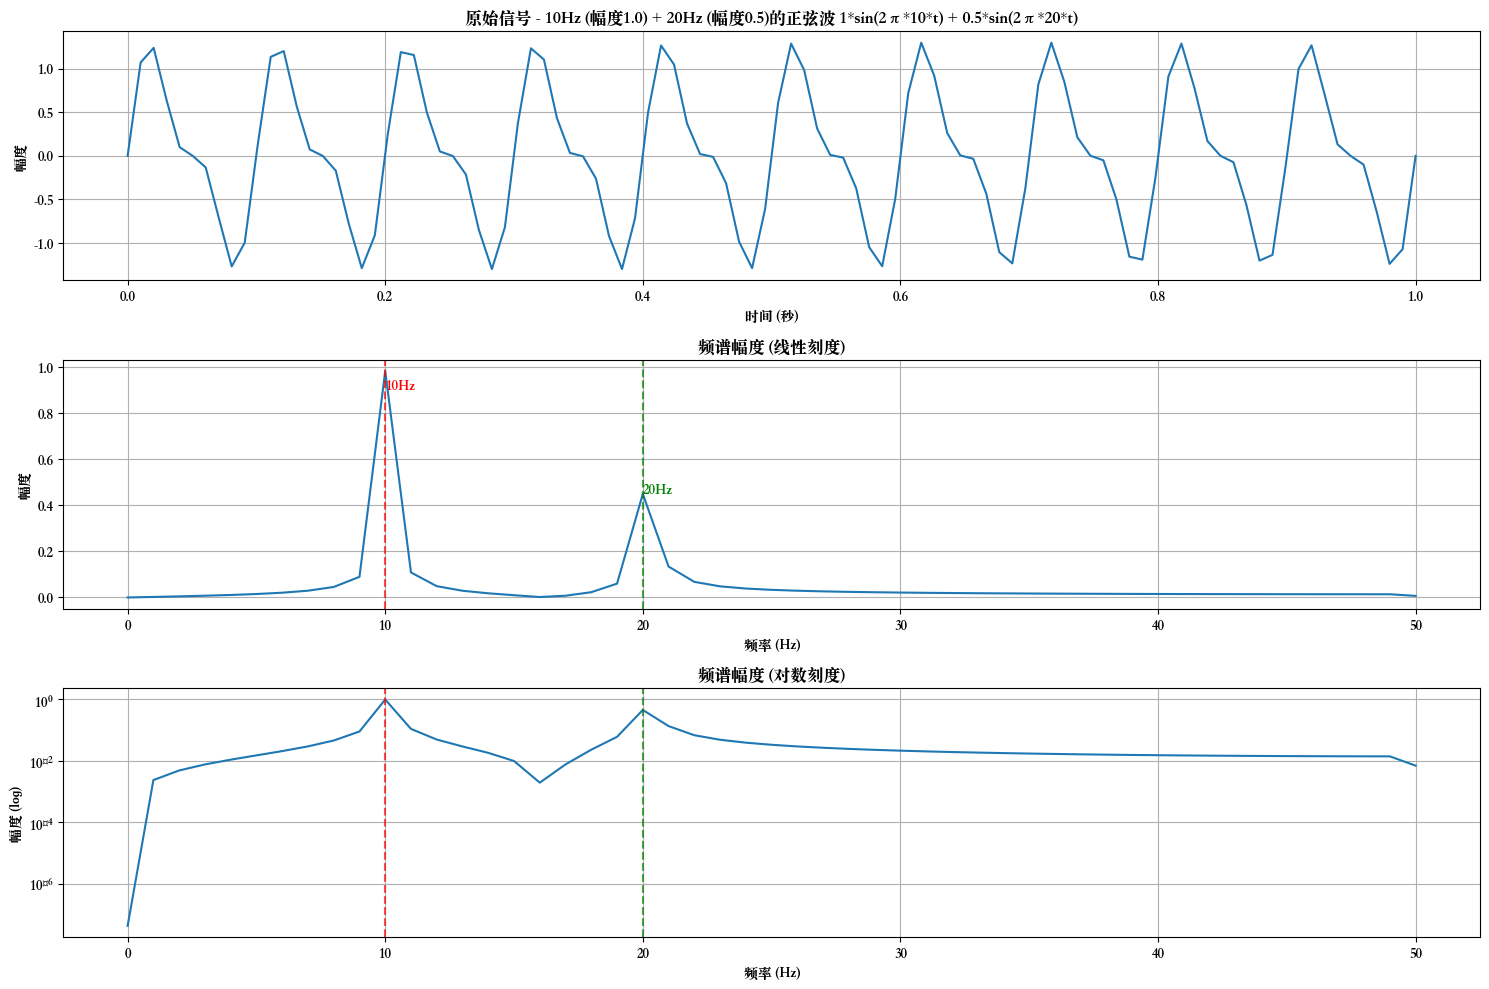

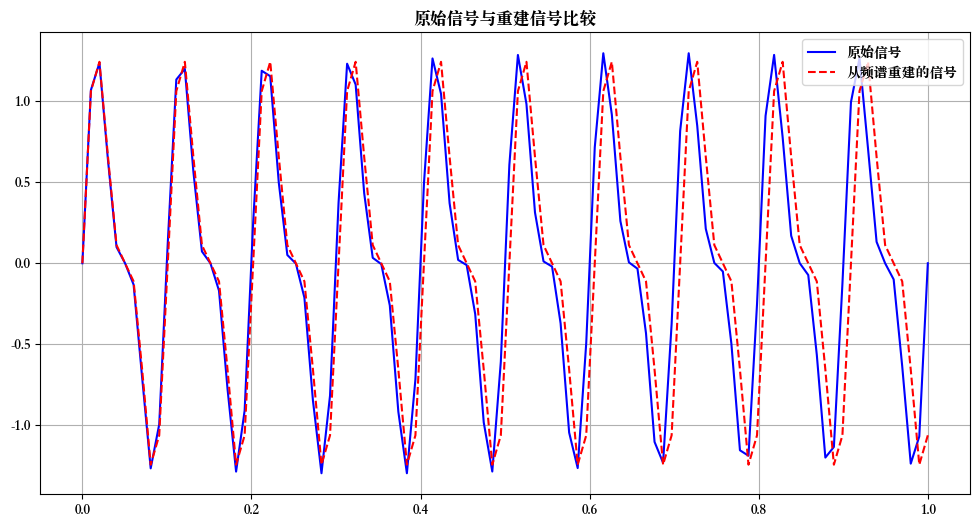


重建误差(最大绝对差): 1.0633112192


In [13]:
# 可视化结果    
plt.figure(figsize=(15, 10))

# 原始信号
plt.subplot(3, 1, 1)
plt.plot(t.numpy(), signal.numpy())
plt.title('原始信号 - 10Hz (幅度1.0) + 20Hz (幅度0.5)的正弦波 1*sin(2π*10*t) + 0.5*sin(2π*20*t)')
plt.xlabel('时间 (秒)')
plt.ylabel('幅度')
plt.grid(True)

# 频谱幅度 - 线性刻度
plt.subplot(3, 1, 2)
plt.plot(frequencies.numpy(), magnitude_spectrum.numpy())
plt.title('频谱幅度 (线性刻度)')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
# 标注10Hz和20Hz的峰值
plt.axvline(x=10, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=20, color='g', linestyle='--', alpha=0.7)
plt.text(10, 0.9, '10Hz', color='r')
plt.text(20, 0.45, '20Hz', color='g')

# 频谱幅度 - 对数刻度，便于观察小幅值
plt.subplot(3, 1, 3)
plt.semilogy(frequencies.numpy(), magnitude_spectrum.numpy())
plt.title('频谱幅度 (对数刻度)')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度 (log)')
plt.grid(True)
plt.axvline(x=10, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=20, color='g', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 理论验证 - 重建信号
# 创建理想频谱
ideal_spectrum = torch.zeros_like(signal_rfft)
ideal_spectrum[10] = amplitude1 * N / 2 * np.exp(-0.5j * np.pi)  # 10Hz, 相位为-π/2
ideal_spectrum[20] = amplitude2 * N / 2 * np.exp(-0.5j * np.pi)  # 20Hz, 相位为-π/2

# 逆变换重建
reconstructed = torch.fft.irfft(ideal_spectrum, n=N)

# 比较原始信号和重建信号
plt.figure(figsize=(12, 6))
plt.plot(t.numpy(), signal.numpy(), 'b-', label='原始信号')
plt.plot(t.numpy(), reconstructed.numpy(), 'r--', label='从频谱重建的信号')
plt.title('原始信号与重建信号比较')
plt.legend()
plt.grid(True)
plt.show()

# 计算重建误差
error = torch.max(torch.abs(signal - reconstructed))
print(f"\n重建误差(最大绝对差): {error:.10f}")

## scipy.fft

In [2]:
from scipy.fft import fft
fft([4,3,2,1])

array([10.-0.j,  2.-2.j,  2.-0.j,  2.+2.j])

上面实现了
输入数组为 [4, 3, 2, 1]，长度为 4。傅里叶变换的结果也是一个长度为 4 的复数数组。

计算公式为：

$ X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i \cdot 2\pi \cdot k \cdot n / N} $


其中：

$ X_k $ 是第 ( k ) 个频率分量的傅里叶系数  
$ x_n $ 是输入信号的第 ( n ) 个样本  
$ N $ 是输入信号的长度（在本例中为 4）  

计算每个  $X_k$ ：

 $ X_0 $ :
 
  $ X_0 = 4 \cdot e^{-i \cdot 2\pi \cdot 0 \cdot 0 / 4} + 3 \cdot e^{-i \cdot 2\pi \cdot 0 \cdot 1 / 4} + 2 \cdot e^{-i \cdot 2\pi \cdot 0 \cdot 2 / 4} + 1 \cdot e^{-i \cdot 2\pi \cdot 0 \cdot 3 / 4} $
  
   $ X_0 = 4 + 3 + 2 + 1 = 10 $

$ X_1 $: 

$  X_1 = 4 \cdot e^{-i \cdot 2\pi \cdot 1 \cdot 0 / 4} + 3 \cdot e^{-i \cdot 2\pi \cdot 1 \cdot 1 / 4} + 2 \cdot e^{-i \cdot 2\pi \cdot 1 \cdot 2 / 4} + 1 \cdot e^{-i \cdot 2\pi \cdot 1 \cdot 3 / 4} $

 $ X_1 = 4 + 3 \cdot e^{-i \cdot \pi / 2} + 2 \cdot e^{-i \cdot \pi} + 1 \cdot e^{-i \cdot 3\pi / 2} $
 
  $ X_1 = 4 + 3 \cdot (-i) + 2 \cdot (-1) + 1 \cdot i $

$ X_1 = 4 - 2 - 2i $

 $ X_1 = 2 - 2i $
 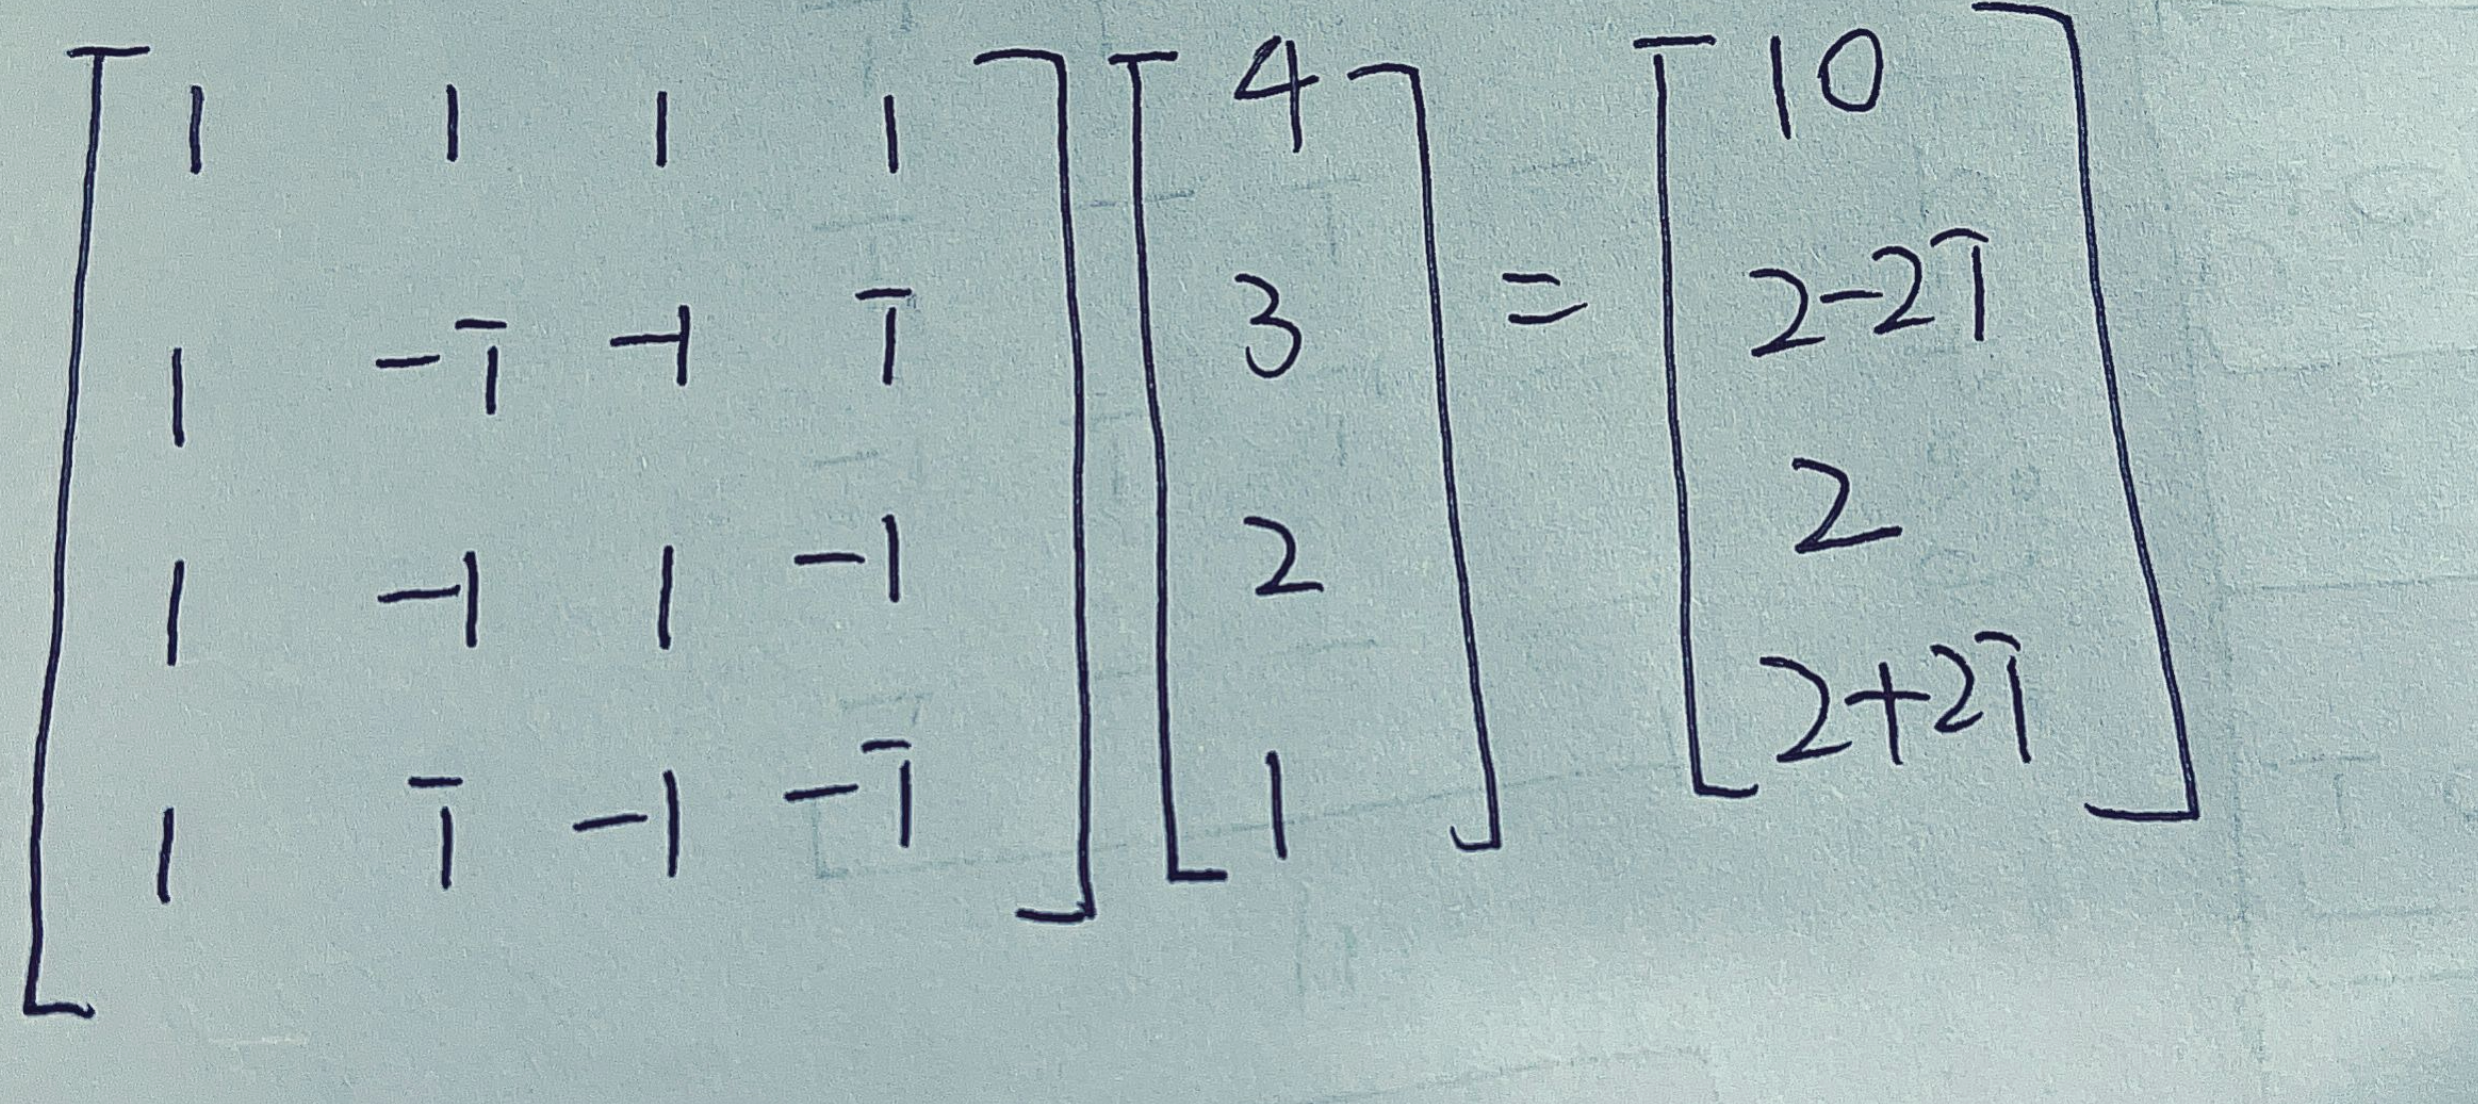

## 频谱、相位、谐波可视化

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import torch
import torch.nn.functional as F

In [15]:
# 创建一个模拟的一周电力需求数据 (每小时一个点，共7*24=168个点)
hours = np.arange(168)
# 创建长期趋势
trend = 100 + 0.05 * hours
# 创建日内变化 (24小时周期)
daily = 15 * np.sin(2*np.pi*hours/24 - np.pi/2)
# 创建工作日vs周末变化 (一周周期)
weekly = np.zeros_like(hours)
for i in range(7):
    if i < 5:  # 工作日
        weekly[i*24:(i+1)*24] = 10
    else:      # 周末
        weekly[i*24:(i+1)*24] = -10
# 添加一些噪声
noise = 3 * np.random.randn(168)
# 合成最终时间序列
power_demand = trend + daily + weekly + noise

$trend = 100+0.05\times t$  线性增长的趋势，初始值为 100，每小时增加 0.05

$daily = 15 \sin(\frac{2\pi t}{24}-\frac{\pi}{2})$ 24 小时周期的正弦波，幅度为 15，相位偏移为 -π/2。

weekly 这是一个每周周期的变化，工作日增加 10，周末减少 10。

noise = 3 * np.random.randn(168) 这是一个均值为 0，标准差为 3 的高斯噪声。

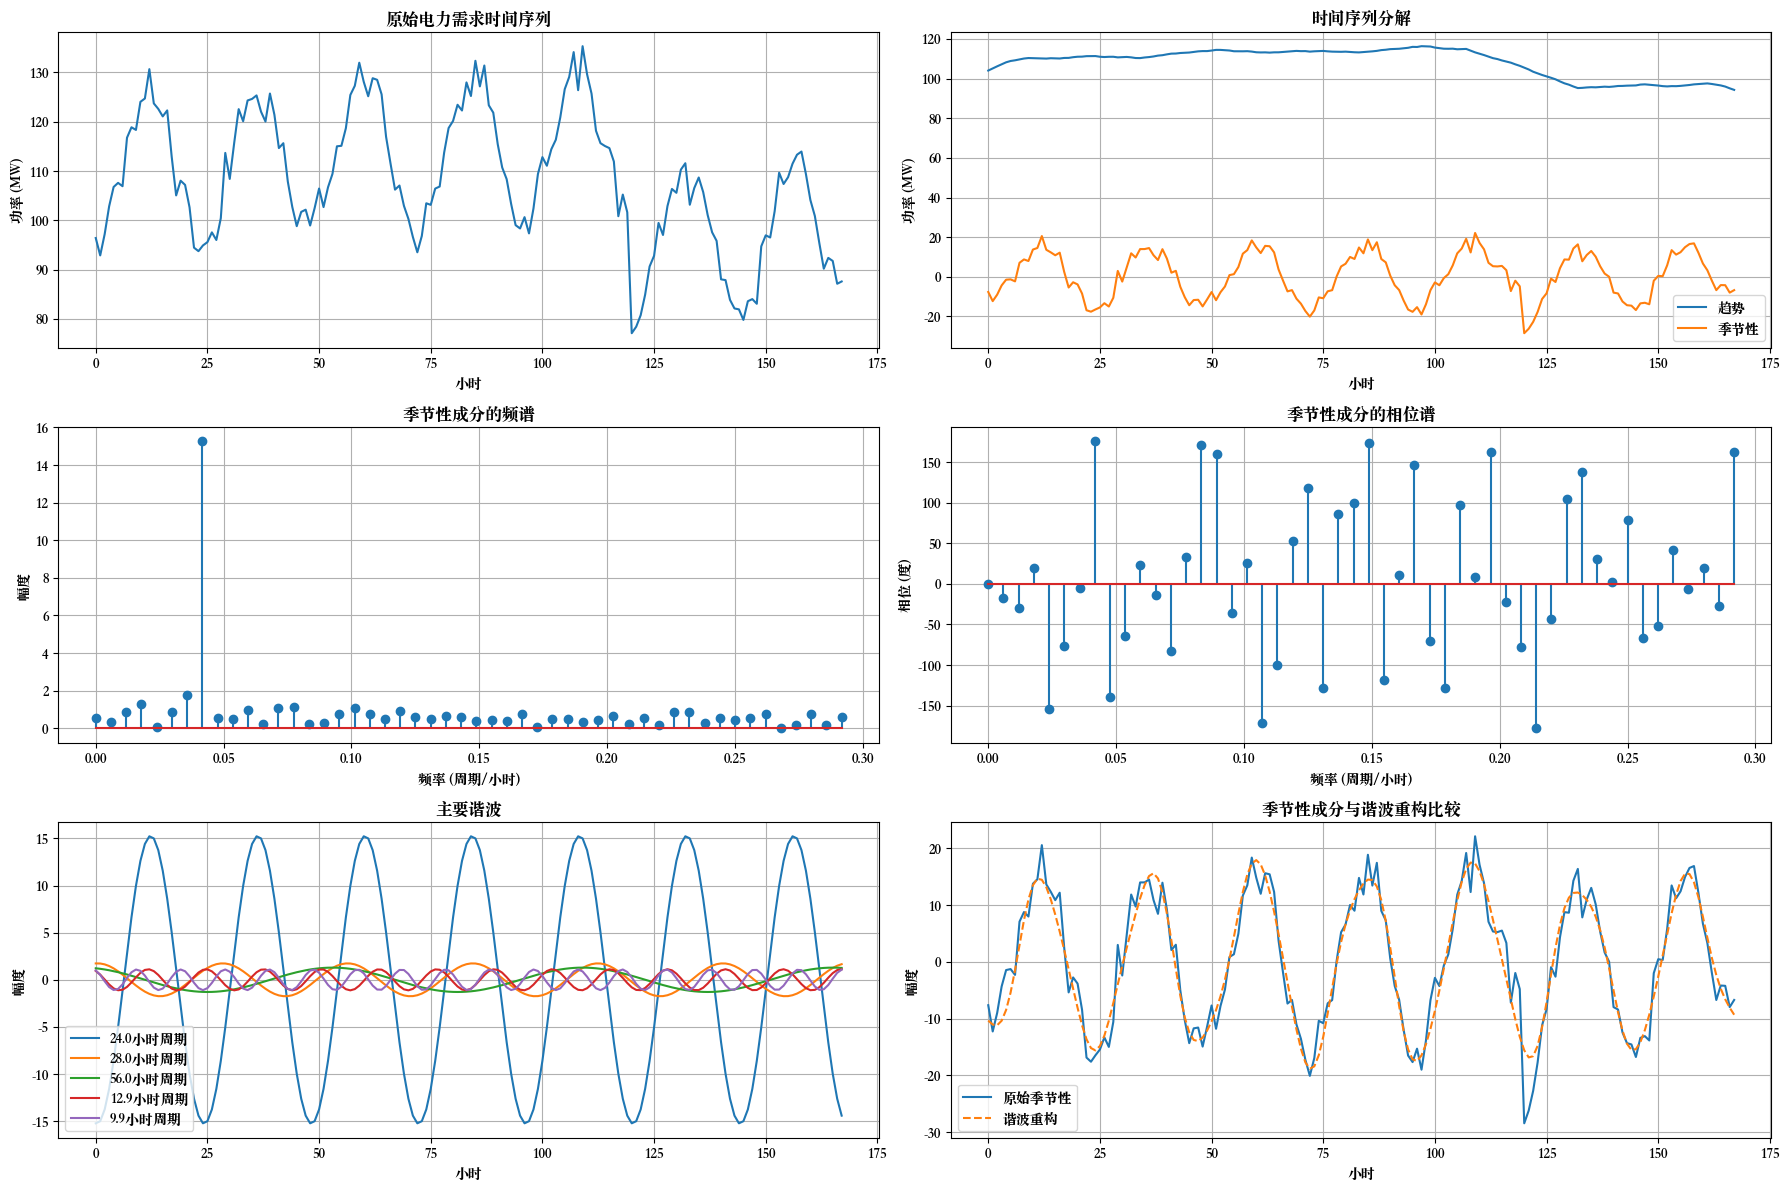

主要谐波:
- 周期: 24.0小时, 幅度: 15.27, 相位: 175.7°
- 周期: 28.0小时, 幅度: 1.74, 相位: -5.5°
- 周期: 56.0小时, 幅度: 1.29, 相位: 19.1°
- 周期: 12.9小时, 幅度: 1.12, 相位: 32.7°
- 周期: 9.9小时, 幅度: 1.10, 相位: 25.4°


In [ ]:
# 模拟Autoformer的时间序列分解函数
def series_decomp(data, kernel_size=25):
    # 使用卷积实现移动平均
    weights = torch.ones(kernel_size) / kernel_size
    weights = weights.view(1, 1, -1).to(torch.float32)
    data_pad = F.pad(torch.from_numpy(data).float().view(1, 1, -1), 
                    (kernel_size//2, kernel_size//2), mode='replicate')
    trend = F.conv1d(data_pad, weights).view(-1).numpy()
    seasonal = data - trend
    return seasonal, trend

# 使用FFT分析季节性成分中的谐波
def analyze_harmonics(seasonal, sampling_rate=1):
    # 执行FFT
    fft_result = np.fft.rfft(seasonal)
    # 计算频率
    freqs = np.fft.rfftfreq(len(seasonal), d=1/sampling_rate)
    # 计算幅度
    magnitudes = np.abs(fft_result) * 2 / len(seasonal)
    # 计算相位 (转换为度)
    phases = np.angle(fft_result) * 180 / np.pi
    return freqs, magnitudes, phases

# 分解时间序列
seasonal, trend = series_decomp(power_demand)

# 分析谐波
freqs, magnitudes, phases = analyze_harmonics(seasonal)

# 找出主要谐波 (幅度最大的几个)
n_harmonics = 5
top_indices = np.argsort(magnitudes)[-n_harmonics:][::-1]
main_freqs = freqs[top_indices]
main_periods = 1/main_freqs[main_freqs > 0]  # 避免除以零
main_magnitudes = magnitudes[top_indices]
main_phases = phases[top_indices]

# 重构信号，仅使用主要谐波
reconstructed_seasonal = np.zeros_like(seasonal)
t = np.arange(len(seasonal))
for i, idx in enumerate(top_indices):
    if freqs[idx] > 0:  # 跳过直流分量
        reconstructed_seasonal += main_magnitudes[i] * np.cos(2*np.pi*freqs[idx]*t + np.radians(main_phases[i]))

# 可视化
plt.figure(figsize=(18, 12))

# 原始时间序列
plt.subplot(3, 2, 1)
plt.plot(hours, power_demand)
plt.title('原始电力需求时间序列')
plt.xlabel('小时')
plt.ylabel('功率 (MW)')
plt.grid(True)

# 趋势和季节性分解
plt.subplot(3, 2, 2)
plt.plot(hours, trend, label='趋势')
plt.plot(hours, seasonal, label='季节性')
plt.title('时间序列分解')
plt.xlabel('小时')
plt.ylabel('功率 (MW)')
plt.legend()
plt.grid(True)

# 频谱分析
plt.subplot(3, 2, 3)
plt.stem(freqs[:50], magnitudes[:50])  # 只显示前50个频率
plt.title('季节性成分的频谱')
plt.xlabel('频率 (周期/小时)')
plt.ylabel('幅度')
plt.grid(True)

# 相位分析
plt.subplot(3, 2, 4)
plt.stem(freqs[:50], phases[:50])
plt.title('季节性成分的相位谱')
plt.xlabel('频率 (周期/小时)')
plt.ylabel('相位 (度)')
plt.grid(True)

# 主要谐波
plt.subplot(3, 2, 5)
for i, idx in enumerate(top_indices):
    if freqs[idx] > 0:  # 跳过直流分量
        period = 1/freqs[idx]
        plt.plot(hours, main_magnitudes[i] * np.cos(2*np.pi*freqs[idx]*t + np.radians(main_phases[i])),
                 label=f'{period:.1f}小时周期')
plt.title('主要谐波')
plt.xlabel('小时')
plt.ylabel('幅度')
plt.legend()
plt.grid(True)

# 原始季节性与重构比较
plt.subplot(3, 2, 6)
plt.plot(hours, seasonal, label='原始季节性')
plt.plot(hours, reconstructed_seasonal, label='谐波重构', linestyle='--')
plt.title('季节性成分与谐波重构比较')
plt.xlabel('小时')
plt.ylabel('幅度')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 打印主要谐波信息
print("主要谐波:")
for i, idx in enumerate(top_indices):
    if freqs[idx] > 0:
        print(f"- 周期: {1/freqs[idx]:.1f}小时, 幅度: {main_magnitudes[i]:.2f}, 相位: {main_phases[i]:.1f}°")

## 欧拉公式的图像化表示

### 复指数信号: $f = e^{{i \omega t}}$

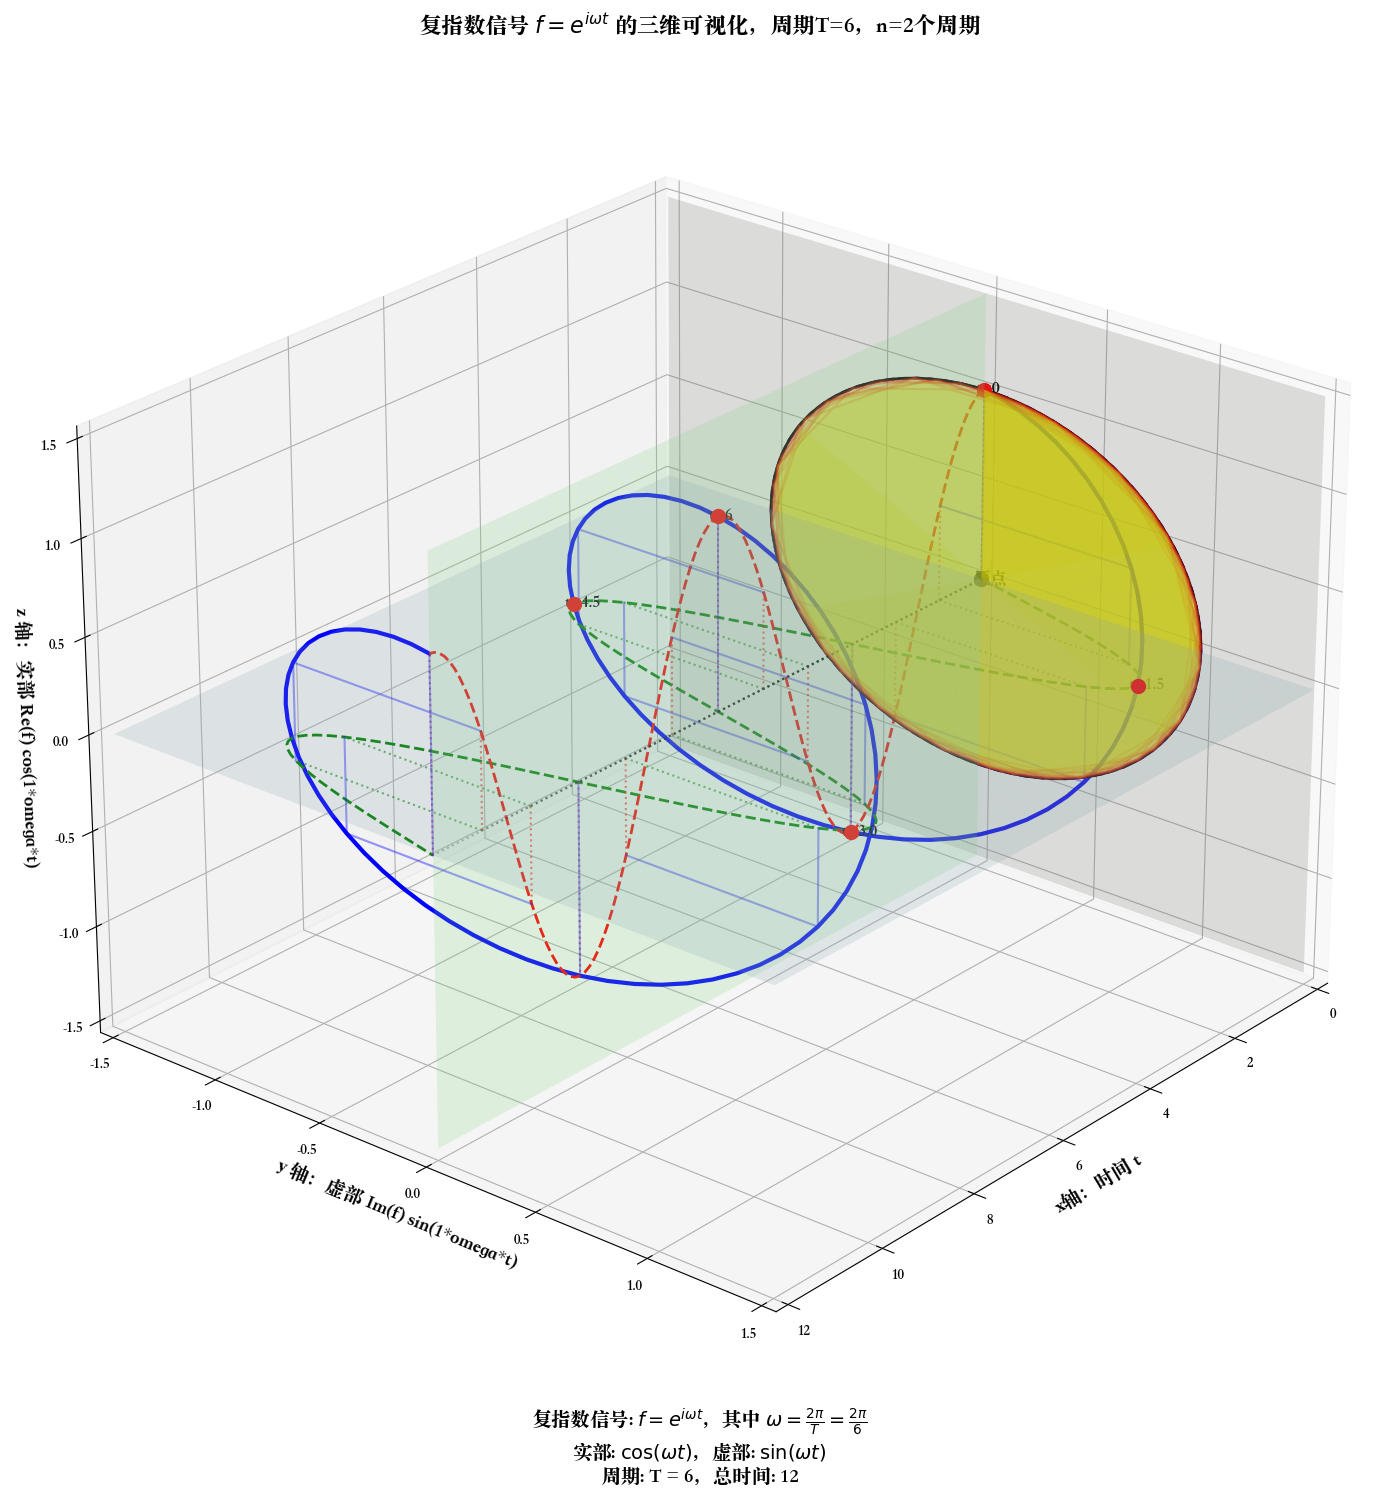

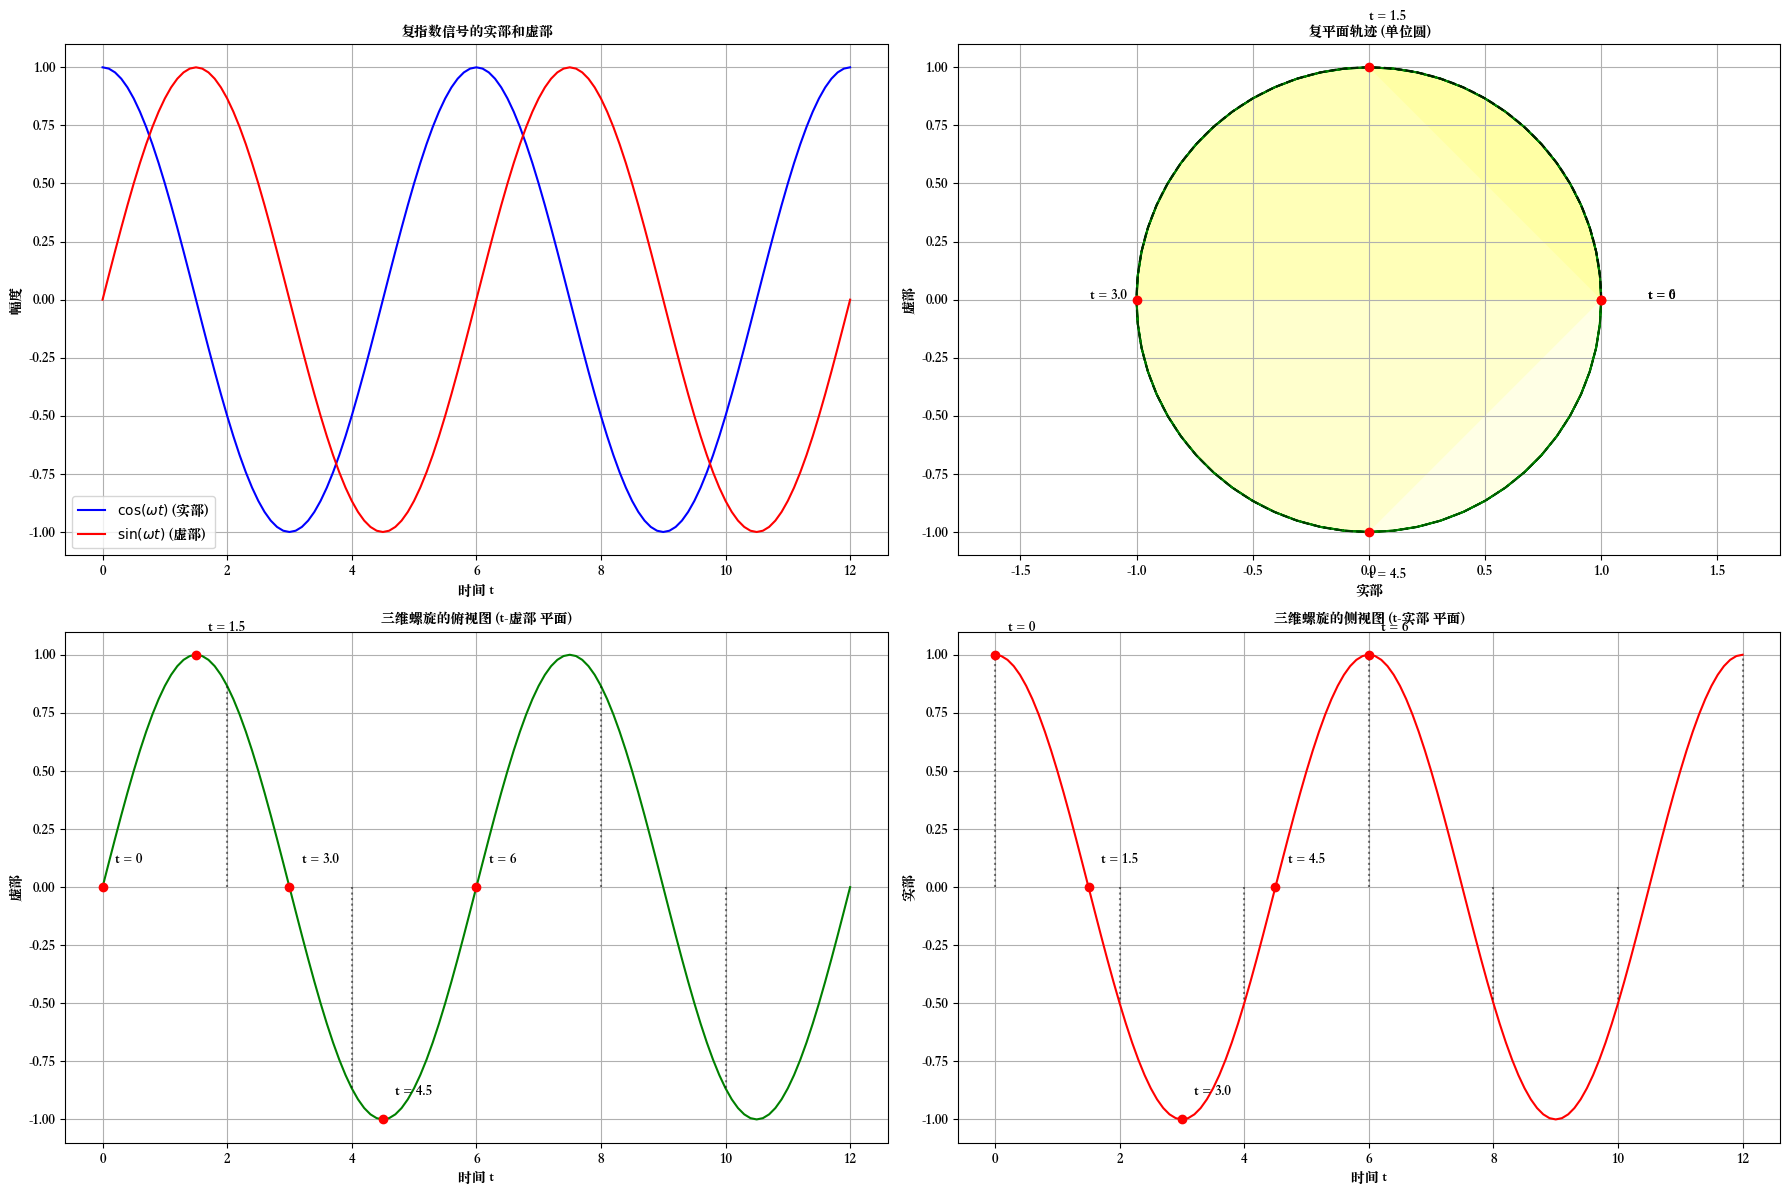

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

# 设置中文显示
font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'  # macOS 中的宋体字体
chinese_font = FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 参数设置
T = 6  # 周期
omega = (2 * np.pi) / T  # 角频率
n = 2  # 周期个数
t = np.arange(0, n * T + 0.1, 0.1)  # 时间序列，从0到n*T，步长为0.1

# 计算复指数信号
f = np.exp(1j * omega * t)
real_part = np.real(f)  # 实部
imag_part = np.imag(f)  # 虚部

# 创建三维图像
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维曲线
spiral, = ax.plot(t, imag_part, real_part, linewidth=3, color='blue', label='复指数信号')

# 创建投影平面
# xy平面 (z=0)
max_t = n * T
xy_x, xy_y = np.meshgrid(np.linspace(0, max_t, 20), np.linspace(-1.5, 1.5, 20))
xy_z = np.zeros_like(xy_x)
xy_plane = ax.plot_surface(xy_x, xy_y, xy_z, alpha=0.2, color='lightblue', label='xy平面')

# xz平面 (y=0)
xz_x, xz_z = np.meshgrid(np.linspace(0, max_t, 20), np.linspace(-1.5, 1.5, 20))
xz_y = np.zeros_like(xz_x)
xz_plane = ax.plot_surface(xz_x, xz_y, xz_z, alpha=0.2, color='lightgreen', label='xz平面')

# yz平面 (x=0)
yz_y, yz_z = np.meshgrid(np.linspace(-1.5, 1.5, 20), np.linspace(-1.5, 1.5, 20))
yz_x = np.zeros_like(yz_y)
yz_plane = ax.plot_surface(yz_x, yz_y, yz_z, alpha=0.2, color='lightyellow', label='yz平面')

# 绘制投影曲线
xy_proj, = ax.plot(t, imag_part, np.zeros_like(t), 'g--', linewidth=2, label='xy平面投影')
xz_proj, = ax.plot(t, np.zeros_like(t), real_part, 'r--', linewidth=2, label='xz平面投影')
yz_proj, = ax.plot(np.zeros_like(t), imag_part, real_part, 'm--', linewidth=2, label='yz平面投影')

# 绘制单位圆
theta = np.linspace(0, 2*np.pi, 100)
y_circle = np.sin(theta)
z_circle = np.cos(theta)
t_circle = np.zeros_like(theta)
unit_circle, = ax.plot(t_circle, y_circle, z_circle, 'k-', linewidth=2, label='单位圆')

# 添加阴影效果
# 选择几个关键点来画阴影
shadow_indices = np.arange(0, len(t), 10)  # 每10个点取一个
for i in shadow_indices:
    # 从复平面到时间轴的竖线
    ax.plot([0, t[i]], [0, 0], [0, 0], 'k:', alpha=0.3)
    
    # 从时间轴到xy投影的线
    ax.plot([t[i], t[i]], [0, imag_part[i]], [0, 0], 'g:', alpha=0.6)
    
    # 从时间轴到xz投影的线
    ax.plot([t[i], t[i]], [0, 0], [0, real_part[i]], 'r:', alpha=0.6)
    
    # 从投影点到空间曲线的连线
    ax.plot([t[i], t[i]], [imag_part[i], imag_part[i]], [0, real_part[i]], 'b-', alpha=0.4)
    ax.plot([t[i], t[i]], [0, imag_part[i]], [real_part[i], real_part[i]], 'b-', alpha=0.4)
    
    # 在0点处画一个到当前点的扇形阴影
    if i > 0:
        # 从原点到复平面上的点的扇形
        angle = np.linspace(0, omega * t[i], 20)
        x_fan = np.zeros_like(angle)
        y_fan = np.sin(angle)
        z_fan = np.cos(angle)
        ax.plot(x_fan, y_fan, z_fan, 'r-', alpha=0.3)
        
        # 填充扇形区域
        ax.plot_surface(
            np.outer(x_fan, np.ones(2)),
            np.outer(y_fan, np.linspace(0, 1, 2)),
            np.outer(z_fan, np.linspace(0, 1, 2)),
            color='yellow', alpha=0.1
        )

# 标记特殊点
special_times = [0, T/4, T/2, 3*T/4, T]
for st in special_times:
    idx = np.argmin(np.abs(t - st))
    ax.scatter([t[idx]], [imag_part[idx]], [real_part[idx]], color='red', s=100, label=f't={st}' if st == 0 else "")
    ax.text(t[idx]+0.2, imag_part[idx], real_part[idx], f't={st}', fontsize=12)

# 设置坐标轴标签
ax.set_xlabel('x轴：时间 t', fontproperties=chinese_font, fontsize=14)
ax.set_ylabel('y 轴：虚部 Im(f) sin(1*omega*t)', fontproperties=chinese_font, fontsize=14)
ax.set_zlabel('z 轴：实部 Re(f) cos(1*omega*t)', fontproperties=chinese_font, fontsize=14)

# 设置坐标轴范围
ax.set_xlim(0, max_t)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

# 添加网格
ax.grid(True)

# 设置标题
ax.set_title(f'复指数信号 $f=e^{{i\\omega t}}$ 的三维可视化，周期T={T}，n={n}个周期',
            fontproperties=chinese_font, fontsize=16)

# 添加0点标记
ax.scatter([0], [0], [0], color='black', s=100, marker='o')
ax.text(0.2, 0, 0, '原点', fontsize=12, fontproperties=chinese_font)

# 添加图例
# ax.legend(loc='upper right', prop=chinese_font)  # 图例太多可能会挡住图像

# 添加数学公式说明
formula_text = (
    f"复指数信号: $f = e^{{i\\omega t}}$，其中 $\\omega = \\frac{{2\\pi}}{{T}} = \\frac{{2\\pi}}{{{T}}}$\n"
    f"实部: $\\cos(\\omega t)$，虚部: $\\sin(\\omega t)$\n"
    f"周期: T = {T}，总时间: {n*T}"
)
fig.text(0.5, 0.02, formula_text, ha='center', fontproperties=chinese_font, fontsize=14)

# 设置更好的视角
ax.view_init(elev=25, azim=40)

# 调整图形布局
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# 绘制平面投影的详细视图
plt.figure(figsize=(18, 12))

# 1. 时间域信号
plt.subplot(2, 2, 1)
plt.plot(t, real_part, 'b-', label=r'$\cos(\omega t)$ (实部)')
plt.plot(t, imag_part, 'r-', label=r'$\sin(\omega t)$ (虚部)')
plt.grid(True)
plt.legend(prop=chinese_font)
plt.title('复指数信号的实部和虚部', fontproperties=chinese_font)
plt.xlabel('时间 t', fontproperties=chinese_font)
plt.ylabel('幅度', fontproperties=chinese_font)

# 2. 复平面上的轨迹
plt.subplot(2, 2, 2)
plt.plot(real_part, imag_part, 'g-')
plt.grid(True)
plt.title('复平面轨迹 (单位圆)', fontproperties=chinese_font)
plt.xlabel('实部', fontproperties=chinese_font)
plt.ylabel('虚部', fontproperties=chinese_font)
plt.axis('equal')  # 保持坐标轴比例一致

# 添加阴影扇区
for st in special_times:
    idx = np.argmin(np.abs(t - st))
    angle = np.linspace(0, omega * t[idx], 100)
    x_fan = np.cos(angle)
    y_fan = np.sin(angle)
    plt.fill(x_fan, y_fan, 'yellow', alpha=0.1)
    plt.plot(x_fan, y_fan, 'k--', alpha=0.3)
    
# 标记特殊点
for st in special_times:
    idx = np.argmin(np.abs(t - st))
    plt.plot(real_part[idx], imag_part[idx], 'ro')
    plt.annotate(f't = {st}', 
                xy=(real_part[idx], imag_part[idx]),
                xytext=(real_part[idx]*1.2, imag_part[idx]*1.2),
                fontproperties=chinese_font,
                fontsize=10)

# 3. 三维螺旋的俯视图
plt.subplot(2, 2, 3)
plt.plot(t, imag_part, 'g-')
plt.grid(True)
plt.title('三维螺旋的俯视图 (t-虚部 平面)', fontproperties=chinese_font)
plt.xlabel('时间 t', fontproperties=chinese_font)
plt.ylabel('虚部', fontproperties=chinese_font)

# 添加从时间轴到曲线的垂线阴影
shadow_indices = np.arange(0, len(t), 20)
for i in shadow_indices:
    plt.plot([t[i], t[i]], [0, imag_part[i]], 'k:', alpha=0.5)
    
# 标记特殊点
for st in special_times:
    idx = np.argmin(np.abs(t - st))
    plt.plot(t[idx], imag_part[idx], 'ro')
    plt.annotate(f't = {st}', 
                xy=(t[idx], imag_part[idx]),
                xytext=(t[idx]+0.2, imag_part[idx]+0.1),
                fontproperties=chinese_font,
                fontsize=10)

# 4. 三维螺旋的侧视图
plt.subplot(2, 2, 4)
plt.plot(t, real_part, 'r-')
plt.grid(True)
plt.title('三维螺旋的侧视图 (t-实部 平面)', fontproperties=chinese_font)
plt.xlabel('时间 t', fontproperties=chinese_font)
plt.ylabel('实部', fontproperties=chinese_font)

# 添加从时间轴到曲线的垂线阴影
for i in shadow_indices:
    plt.plot([t[i], t[i]], [0, real_part[i]], 'k:', alpha=0.5)
    
# 标记特殊点
for st in special_times:
    idx = np.argmin(np.abs(t - st))
    plt.plot(t[idx], real_part[idx], 'ro')
    plt.annotate(f't = {st}', 
                xy=(t[idx], real_part[idx]),
                xytext=(t[idx]+0.2, real_part[idx]+0.1),
                fontproperties=chinese_font,
                fontsize=10)

plt.tight_layout()
plt.show()

### 复指数信号: $f = e^{{2i \omega t}}$

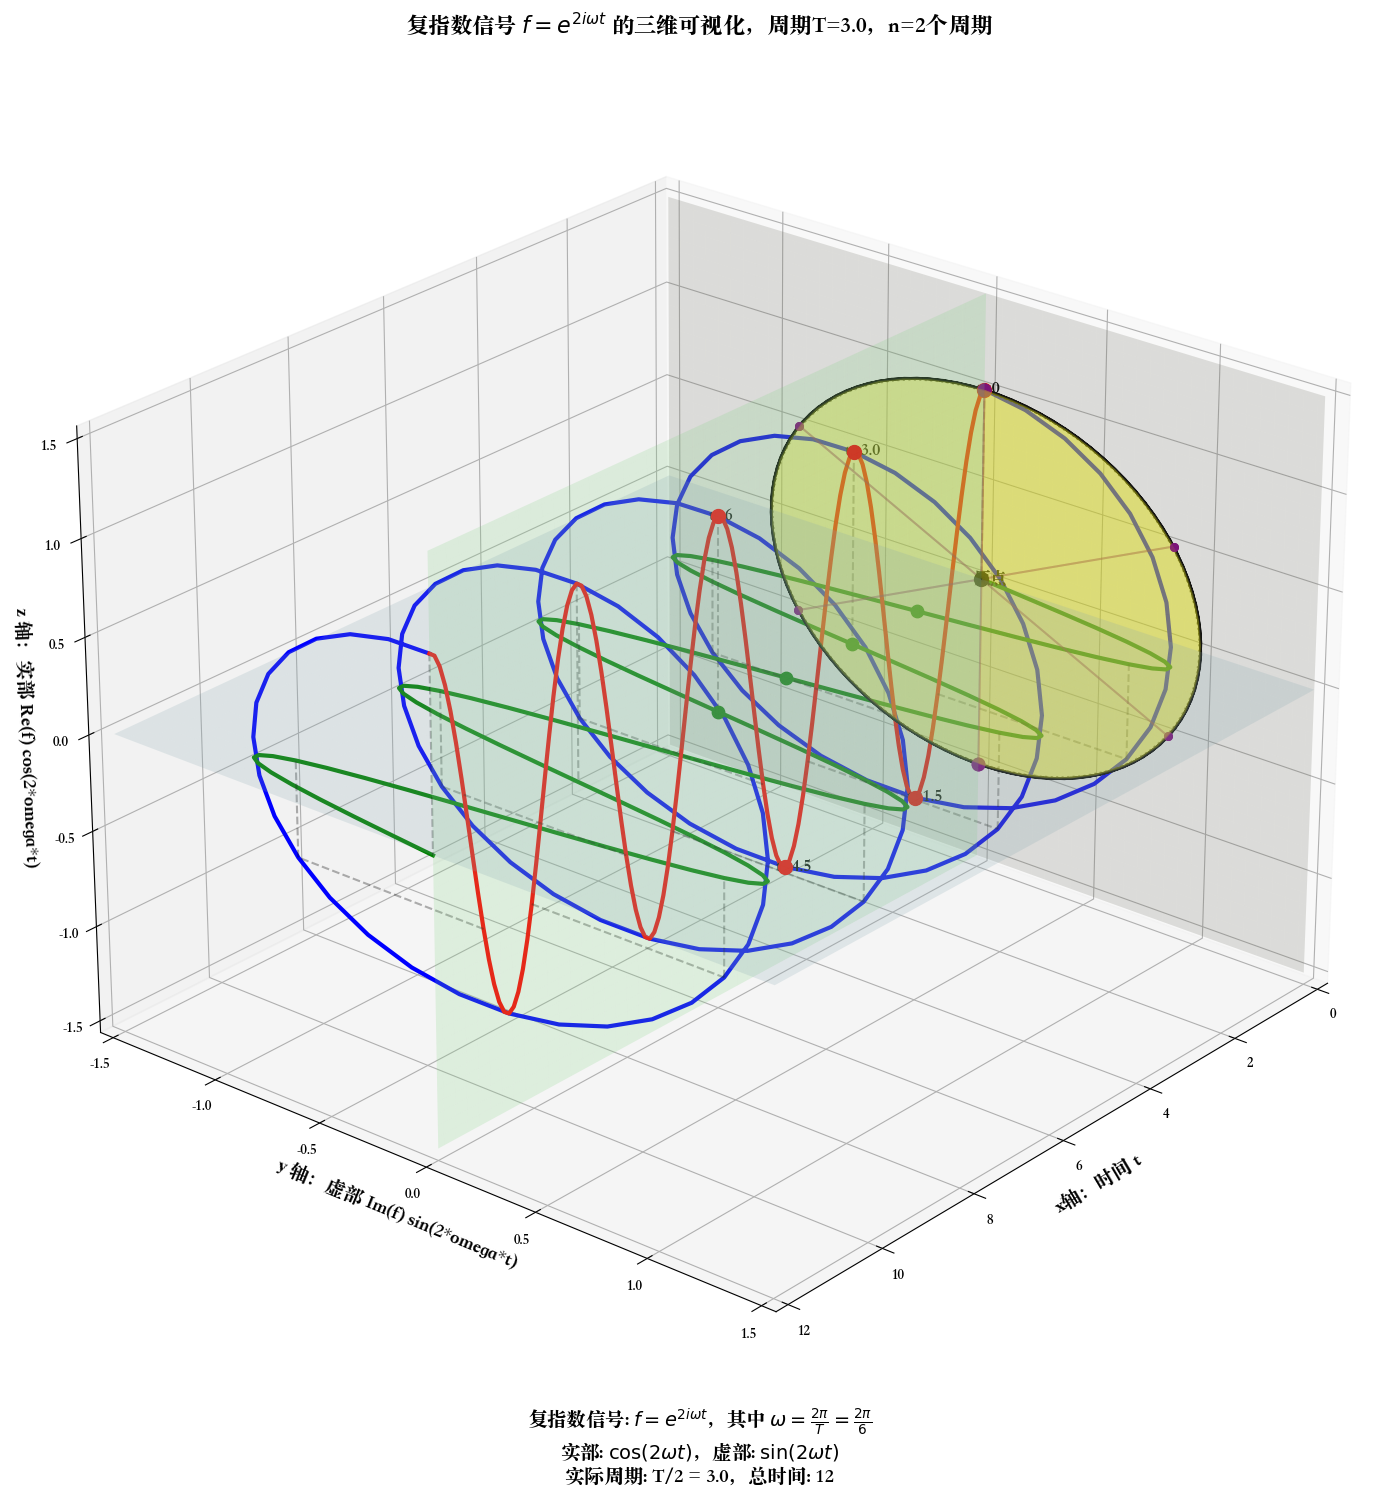

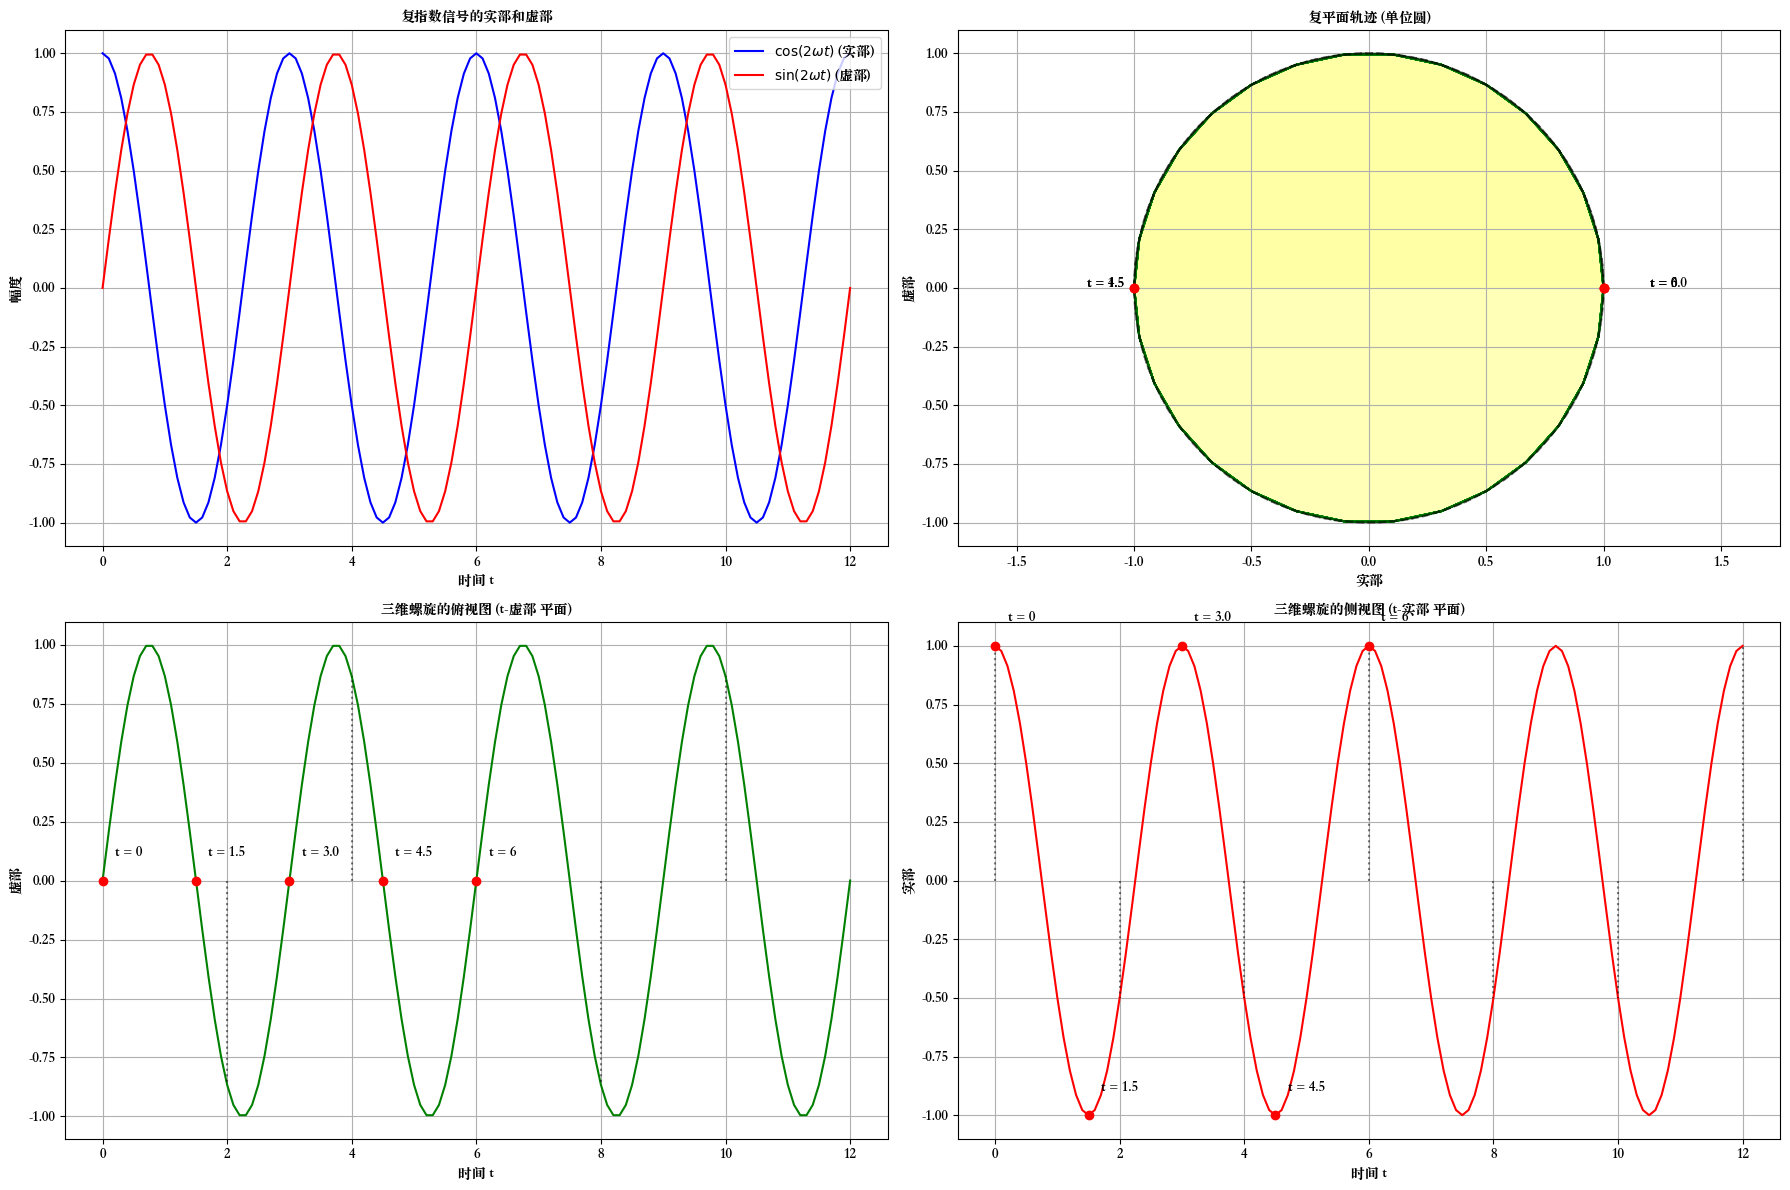

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib import cm

# 设置中文显示
font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'  # macOS 中的宋体字体
chinese_font = FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 参数设置
T = 6  # 周期
omega = (2 * np.pi) / T  # 角频率
n = 2  # 周期个数
t = np.arange(0, n * T + 0.1, 0.1)  # 时间序列，从0到n*T，步长为0.1

# 计算复指数信号
f = np.exp(2j * omega * t)  # 注意这里使用2j
real_part = np.real(f)  # 实部
imag_part = np.imag(f)  # 虚部

# 创建三维图像
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维曲线
spiral, = ax.plot(t, imag_part, real_part, linewidth=3, color='blue', label='复指数信号')

# 参数设置
max_t = n * T
t_grid = np.linspace(0, max_t, 100)
xy_range = np.linspace(-1.5, 1.5, 100)
zero_grid = np.zeros_like(t_grid)

# 创建投影平面网格
t_mesh, im_mesh = np.meshgrid(t_grid, xy_range)
re_mesh = np.zeros_like(t_mesh)

# XY平面（地面投影）- 生成实际投影曲面
Z_xy = np.zeros_like(t_mesh)  # z=0平面
# 创建投影数据
t_proj = t.reshape(-1, 1)
imag_proj = imag_part.reshape(-1, 1)
points_xy = np.hstack((t_proj, imag_proj))

# 绘制XY平面基础
xy_plane = ax.plot_surface(t_mesh, im_mesh, re_mesh, 
                          color='lightblue', alpha=0.2)

# 在XY平面上绘制投影曲线
xy_proj, = ax.plot(t, imag_part, np.zeros_like(t), 'g-', linewidth=3)

# 绘制从曲线到XY平面的垂直线（"阴影线"）
for i in range(0, len(t), 10):
    ax.plot([t[i], t[i]], [imag_part[i], imag_part[i]], [real_part[i], 0], 'k--', alpha=0.3)

# XZ平面（后墙投影）
t_mesh, re_mesh = np.meshgrid(t_grid, xy_range)
im_mesh = np.zeros_like(t_mesh)  # y=0平面

# 绘制XZ平面
xz_plane = ax.plot_surface(t_mesh, im_mesh, re_mesh,
                          color='lightgreen', alpha=0.2)

# 在XZ平面上绘制投影曲线 
xz_proj, = ax.plot(t, np.zeros_like(t), real_part, 'r-', linewidth=3)

# 绘制从曲线到XZ平面的垂直线
for i in range(0, len(t), 10):
    ax.plot([t[i], t[i]], [0, imag_part[i]], [real_part[i], real_part[i]], 'k--', alpha=0.3)

# YZ平面（侧墙投影）- 复平面
im_mesh, re_mesh = np.meshgrid(xy_range, xy_range)
t_mesh = np.zeros_like(im_mesh)  # x=0平面

# 绘制YZ平面
yz_plane = ax.plot_surface(t_mesh, im_mesh, re_mesh,
                          color='lightyellow', alpha=0.2)

# 在YZ平面上绘制单位圆 
theta = np.linspace(0, 2*np.pi, 100)
y_circle = np.sin(2*theta)  # 这里使用2*theta匹配f=exp(2j*omega*t)
z_circle = np.cos(2*theta)
t_circle = np.zeros_like(theta)
unit_circle, = ax.plot(t_circle, y_circle, z_circle, 'k-', linewidth=2)

# 在复平面(YZ平面)上创建时间刻度的投影点
# 这些点表示复指数在特定时间点的值在复平面上的投影
special_times = np.linspace(0, T, 13)  # 更多的点以显示轨迹
for st in special_times:
    idx = np.argmin(np.abs(t - st))
    ax.scatter([0], [imag_part[idx]], [real_part[idx]], color='purple', s=30)
    # 连接原点到复平面上的点
    ax.plot([0, 0], [0, imag_part[idx]], [0, real_part[idx]], 'purple', alpha=0.3)

# 填充扇区阴影 - 在复平面(YZ平面)上
# 选择几个代表性时间点
for st in [T/4, T/2, 3*T/4, T]:
    idx = np.argmin(np.abs(t - st))
    # 计算扇区范围内的角度
    angle = np.linspace(0, 2*omega*t[idx], 50)  # 注意这里使用2*omega匹配f=exp(2j*omega*t)
    # 创建扇区点
    x_fan = np.zeros_like(angle)
    y_fan = np.sin(angle)
    z_fan = np.cos(angle)
    # 填充扇区
    fan_x = np.vstack((x_fan, x_fan))
    fan_y = np.vstack((np.zeros_like(angle), y_fan))
    fan_z = np.vstack((np.zeros_like(angle), z_fan))
    ax.plot_surface(fan_x, fan_y, fan_z, color='yellow', alpha=0.1)
    # 绘制扇区边界
    ax.plot(x_fan, y_fan, z_fan, 'k:', alpha=0.5)

# 标记特殊点
highlight_times = [0, T/4, T/2, 3*T/4, T]
for st in highlight_times:
    idx = np.argmin(np.abs(t - st))
    # 在螺旋上标记点
    ax.scatter([t[idx]], [imag_part[idx]], [real_part[idx]], color='red', s=100)
    ax.text(t[idx]+0.2, imag_part[idx], real_part[idx], f't={st}', fontsize=12)
    
    # 在xy平面投影上标记点
    ax.scatter([t[idx]], [imag_part[idx]], [0], color='green', s=80)
    
    # 在xz平面投影上标记点
    ax.scatter([t[idx]], [0], [real_part[idx]], color='red', s=80)
    
    # 在yz平面复平面上标记点
    ax.scatter([0], [imag_part[idx]], [real_part[idx]], color='purple', s=80)

# 添加时间轴上的原点标记
ax.scatter([0], [0], [0], color='black', s=100)
ax.text(0.2, 0, 0, '原点', fontsize=12, fontproperties=chinese_font)

# 设置坐标轴标签
ax.set_xlabel('x轴：时间 t', fontproperties=chinese_font, fontsize=14)
ax.set_ylabel('y 轴：虚部 Im(f) sin(2*omega*t)', fontproperties=chinese_font, fontsize=14)
ax.set_zlabel('z 轴：实部 Re(f) cos(2*omega*t)', fontproperties=chinese_font, fontsize=14)

# 设置坐标轴范围
ax.set_xlim(0, max_t)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

# 添加网格
ax.grid(True)

# 设置标题 - 注意这里是2j而不是j
ax.set_title(f'复指数信号 $f=e^{{2i\\omega t}}$ 的三维可视化，周期T={T/2}，n={n}个周期',
            fontproperties=chinese_font, fontsize=16)

# 添加数学公式说明
formula_text = (
    f"复指数信号: $f = e^{{2i\\omega t}}$，其中 $\\omega = \\frac{{2\\pi}}{{T}} = \\frac{{2\\pi}}{{{T}}}$\n"
    f"实部: $\\cos(2\\omega t)$，虚部: $\\sin(2\\omega t)$\n"
    f"实际周期: T/{2} = {T/2}，总时间: {n*T}"
)
fig.text(0.5, 0.02, formula_text, ha='center', fontproperties=chinese_font, fontsize=14)

# 设置更好的视角
ax.view_init(elev=25, azim=40)

# 调整图形布局
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# 绘制平面投影的详细视图
plt.figure(figsize=(18, 12))

# 1. 时间域信号
plt.subplot(2, 2, 1)
plt.plot(t, real_part, 'b-', label=r'$\cos(2\omega t)$ (实部)')
plt.plot(t, imag_part, 'r-', label=r'$\sin(2\omega t)$ (虚部)')
plt.grid(True)
plt.legend(prop=chinese_font)
plt.title('复指数信号的实部和虚部', fontproperties=chinese_font)
plt.xlabel('时间 t', fontproperties=chinese_font)
plt.ylabel('幅度', fontproperties=chinese_font)

# 2. 复平面上的轨迹
plt.subplot(2, 2, 2)
plt.plot(real_part, imag_part, 'g-')
plt.grid(True)
plt.title('复平面轨迹 (单位圆)', fontproperties=chinese_font)
plt.xlabel('实部', fontproperties=chinese_font)
plt.ylabel('虚部', fontproperties=chinese_font)
plt.axis('equal')  # 保持坐标轴比例一致

# 添加阴影扇区
for st in highlight_times:
    idx = np.argmin(np.abs(t - st))
    angle = np.linspace(0, 2*omega * t[idx], 100)  # 注意这里用2*omega
    x_fan = np.cos(angle)
    y_fan = np.sin(angle)
    plt.fill(x_fan, y_fan, 'yellow', alpha=0.1)
    plt.plot(x_fan, y_fan, 'k--', alpha=0.3)
    
# 标记特殊点
for st in highlight_times:
    idx = np.argmin(np.abs(t - st))
    plt.plot(real_part[idx], imag_part[idx], 'ro')
    plt.annotate(f't = {st}', 
                xy=(real_part[idx], imag_part[idx]),
                xytext=(real_part[idx]*1.2, imag_part[idx]*1.2),
                fontproperties=chinese_font,
                fontsize=10)

# 3. 时间-虚部平面
plt.subplot(2, 2, 3)
plt.plot(t, imag_part, 'g-')
plt.grid(True)
plt.title('三维螺旋的俯视图 (t-虚部 平面)', fontproperties=chinese_font)
plt.xlabel('时间 t', fontproperties=chinese_font)
plt.ylabel('虚部', fontproperties=chinese_font)

# 添加从时间轴到曲线的垂线阴影
shadow_indices = np.arange(0, len(t), 20)
for i in shadow_indices:
    plt.plot([t[i], t[i]], [0, imag_part[i]], 'k:', alpha=0.5)
    
# 标记特殊点
for st in highlight_times:
    idx = np.argmin(np.abs(t - st))
    plt.plot(t[idx], imag_part[idx], 'ro')
    plt.annotate(f't = {st}', 
                xy=(t[idx], imag_part[idx]),
                xytext=(t[idx]+0.2, imag_part[idx]+0.1),
                fontproperties=chinese_font,
                fontsize=10)

# 4. 时间-实部平面
plt.subplot(2, 2, 4)
plt.plot(t, real_part, 'r-')
plt.grid(True)
plt.title('三维螺旋的侧视图 (t-实部 平面)', fontproperties=chinese_font)
plt.xlabel('时间 t', fontproperties=chinese_font)
plt.ylabel('实部', fontproperties=chinese_font)

# 添加从时间轴到曲线的垂线阴影
for i in shadow_indices:
    plt.plot([t[i], t[i]], [0, real_part[i]], 'k:', alpha=0.5)
    
# 标记特殊点
for st in highlight_times:
    idx = np.argmin(np.abs(t - st))
    plt.plot(t[idx], real_part[idx], 'ro')
    plt.annotate(f't = {st}', 
                xy=(t[idx], real_part[idx]),
                xytext=(t[idx]+0.2, real_part[idx]+0.1),
                fontproperties=chinese_font,
                fontsize=10)

plt.tight_layout()
plt.show()